In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np

In [2]:

data = fetch_california_housing()
X = data.data
y = data.target.reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:

def weighted_mse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    weights = tf.abs(y_true) + 0.5
    return tf.reduce_mean(tf.square(y_true - y_pred) * weights)

In [4]:

def build_model(loss_function):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(8,)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss=loss_function)
    return model

In [5]:

model_custom = build_model(weighted_mse)
model_standard = build_model('mse')

c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:

history_custom = model_custom.fit(X_train, y_train, epochs=10, verbose=0)
history_standard = model_standard.fit(X_train, y_train, epochs=10, verbose=0)

In [7]:

custom_pred = model_custom.predict(X_test)
standard_pred = model_standard.predict(X_test)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [8]:

custom_loss = weighted_mse(
    tf.convert_to_tensor(y_test, dtype=tf.float32),
    tf.convert_to_tensor(custom_pred, dtype=tf.float32)
).numpy()

standard_mse = mean_squared_error(y_test, standard_pred)

In [9]:

results = pd.DataFrame({
    'Loss Type': ['Custom Weighted MSE', 'Standard MSE'],
    'Value': [float(custom_loss), float(standard_mse)]
})
print(results)

             Loss Type     Value
0  Custom Weighted MSE  0.438828
1         Standard MSE  0.267057


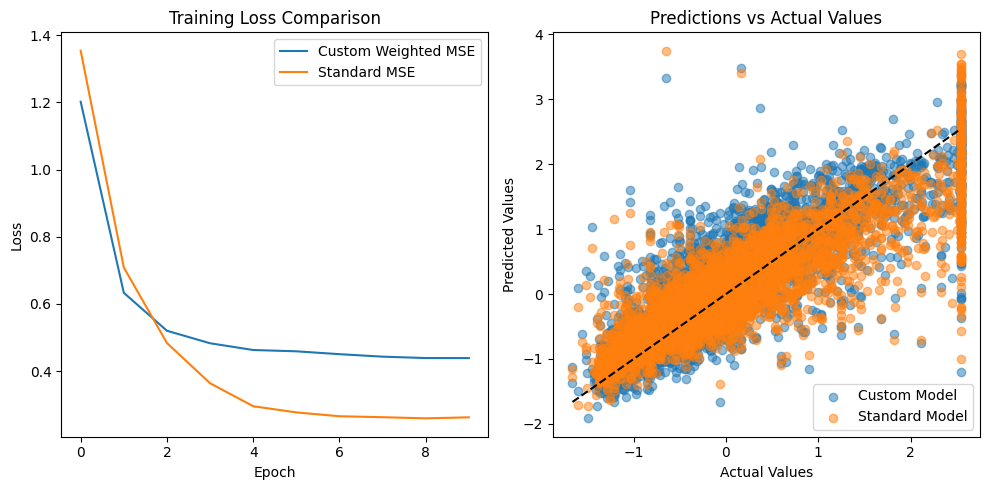

In [10]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history_custom.history['loss'], label='Custom Weighted MSE')
plt.plot(history_standard.history['loss'], label='Standard MSE')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, custom_pred, alpha=0.5, label='Custom Model')
plt.scatter(y_test, standard_pred, alpha=0.5, label='Standard Model')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--')
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()